# 🚀 Data Career Job Market Analysis
## Interactive Analysis Playground

Welcome to your comprehensive job market analysis notebook! This interactive playground lets you explore data career opportunities with style and insight.

## 📦 Setup and Imports

In [1]:
# Core imports
import pandas as pd
import yaml
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Our custom modules
from scraper.coordinator import ScraperCoordinator
from analysis.visualizers import JobVisualizer, plot_keywords_bar_chart, plot_salary_trends_by_location, create_summary_dashboard
from analysis.analyzers import JobAnalyzer, analyze_job_data, analyze_job_types, analyze_company_sizes, analyze_salary_trends_by_location
from analysis.exporters import export_analysis_results

# Configuration imports
with open('config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
visualizer = JobVisualizer()

print("🎉 All modules loaded successfully!")
print(f"📅 Analysis started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🎉 All modules loaded successfully!
📅 Analysis started at: 2025-05-31 07:47:17


## 🕷️ Data Collection Phase

In [2]:
print("🚀 Starting job data collection...")
print("📡 Fetching from multiple job boards...")

# Fetch jobs from available sources
scraper_coordinator = ScraperCoordinator(config)
jobs_df = scraper_coordinator.fetch_all_jobs(['remoteok', 'jobicy'])

if jobs_df.empty:
    print("❌ No job data retrieved. Please check your scrapers and try again.")
else:
    print(f"✅ Successfully collected {len(jobs_df)} job postings!")
    print(f"📊 Data shape: {jobs_df.shape}")
    print(f"🏢 Unique companies: {jobs_df['company'].nunique() if 'company' in jobs_df.columns else 'N/A'}")
    print(f"🌍 Unique locations: {jobs_df['location'].nunique() if 'location' in jobs_df.columns else 'N/A'}")

INFO:scraper.coordinator:Starting job collection from scrapers: ['remoteok', 'jobicy']
INFO:scraper.coordinator:Initializing remoteok scraper
INFO:scraper.coordinator:Fetching jobs from remoteok
INFO:scraper.remoteok_scraper:Fetching data from RemoteOK: https://remoteok.com/api


🚀 Starting job data collection...
📡 Fetching from multiple job boards...


INFO:scraper.remoteok_scraper:RemoteOK Legal Notice: API Terms of Service: Please link back (with follow, and without nofollow!) to the URL on Remote OK and mention Remote OK as a source, so we get traffic back from your site. If you do not we'll have to suspend API access.

Please don't use the Remote OK logo without written permission as it's a registered trademark, please DO use our name Remote OK though.
INFO:scraper.coordinator:Successfully fetched 9 jobs from remoteok
INFO:scraper.coordinator:Initializing jobicy scraper
INFO:scraper.coordinator:Fetching jobs from jobicy
INFO:scraper.jobicy_scraper:Fetching data from Jobicy: https://jobicy.com/api/v2/remote-jobs
INFO:scraper.jobicy_scraper:Fetching Jobicy jobs for keyword: analy
INFO:scraper.jobicy_scraper:Found 12 jobs for keyword 'analy'
INFO:scraper.jobicy_scraper:Fetching Jobicy jobs for keyword: data
INFO:scraper.jobicy_scraper:Found 22 jobs for keyword 'data'
INFO:scraper.jobicy_scraper:Fetching Jobicy jobs for keyword: mach

✅ Successfully collected 44 job postings!
📊 Data shape: (44, 16)
🏢 Unique companies: 41
🌍 Unique locations: 21


## 👀 Data Overview

In [3]:
# Display basic information about our dataset
print("📋 Dataset Info:")
jobs_df.info()

print("\n🔍 First few rows:")
display(jobs_df.head())

print("\n📈 Basic statistics:")
display(jobs_df.describe())

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            44 non-null     object        
 1   url           44 non-null     object        
 2   company       44 non-null     object        
 3   position      44 non-null     object        
 4   description   44 non-null     object        
 5   location      44 non-null     object        
 6   pubDate       44 non-null     datetime64[ns]
 7   salaryMin     44 non-null     float64       
 8   salaryMax     44 non-null     float64       
 9   industry      44 non-null     object        
 10  jobType       44 non-null     object        
 11  jobLevel      44 non-null     object        
 12  tags          44 non-null     object        
 13  currency      44 non-null     object        
 14  salaryPeriod  44 non-null     object        
 15  source        44 non-null 

,id,url,company,position,description,location,pubDate,salaryMin,salaryMax,industry,jobType,jobLevel,tags,currency,salaryPeriod,source
0,1093248,https://remoteOK.com/remote-jobs/remote-growth...,Anchorage Digital,Growth Analyst Financial Institutions Group,"At Anchorage Digital, we are building the worl...",United States,2025-05-31,65000.0,90000.0,,,,"growth, analyst, crypto, security, support, fi...",,,Remote OK
1,1093240,https://remoteOK.com/remote-jobs/remote-resear...,"ACCUFILE, INC.",Research Analyst Law Librarian,Part-Time Remote Research Analyst / Law Librar...,,2025-05-31,90000.0,100000.0,,,,"analyst, support, analytics, legal, non tech",,,Remote OK
2,1093234,https://remoteOK.com/remote-jobs/remote-englis...,TransPerfect,English Language Data Annotator,Work Location: Alberta; remoteWork Schedule: F...,,2025-05-31,60000.0,105000.0,,,,"react, teach, training, legal, recruitment, fu...",,,Remote OK
3,1093225,https://remoteOK.com/remote-jobs/remote-people...,H1,People Analytics Business Partner,"At H1, we believe access to the best healthcar...",US Remote,2025-05-31,30000.0,55000.0,,,,"design, saas, hr, recruiter, support, payroll,...",,,Remote OK
4,1093213,https://remoteOK.com/remote-jobs/remote-jr-bus...,HealthCare,Jr Business Analyst,Join Us!HealthCare.com has become one of Ameri...,Remote,2025-05-31,55000.0,70000.0,,,,"analyst, students, technical, support, softwar...",,,Remote OK



📈 Basic statistics:


,pubDate,salaryMin,salaryMax
count,44,44.000000,44.000000
mean,2025-05-18 10:21:49.090909184,83662.954545,115997.045455
min,2025-05-02 00:00:00,0.000000,0.000000
25%,2025-05-09 00:00:00,22500.000000,41250.000000
50%,2025-05-19 12:00:00,82500.000000,134740.000000
75%,2025-05-30 00:00:00,130250.000000,179250.000000
max,2025-05-31 00:00:00,200700.000000,250900.000000
std,NaN,61227.765497,79594.503450


## 🔬 Deep Dive Analysis

In [4]:
# Initialize our analyzer and visualizer
analyzer = JobAnalyzer()
visualizer = JobVisualizer()

print("🔍 Running comprehensive job market analysis...")

# Perform the main analysis
analysis_results = analyze_job_data(jobs_df)

print("\n✨ Analysis complete!")

🔍 Running comprehensive job market analysis...

Top 20 most common keywords in job descriptions:
- data: 448
- experience: 260
- team: 154
- business: 144
- work: 141
- role: 107
- product: 91
- company: 78
- build: 70
- including: 68
- insights: 65
- new: 64
- teams: 64
- us: 64
- analytics: 64
- opportunity: 61
- engineering: 61
- working: 59
- building: 58
- status: 58

--- Dataset Summary ---
Total jobs: 44
Unique companies: 41
Unique locations: 21
Jobs with salary info: 33

✨ Analysis complete!


## 📊 Keyword Analysis & Word Cloud

🌟 Creating word cloud from job tags...


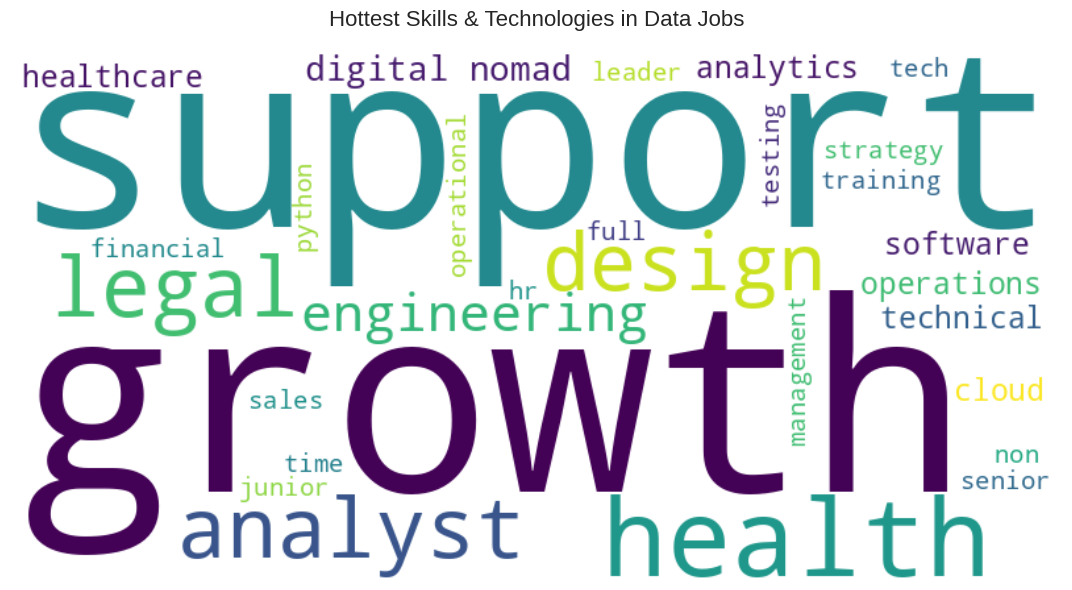

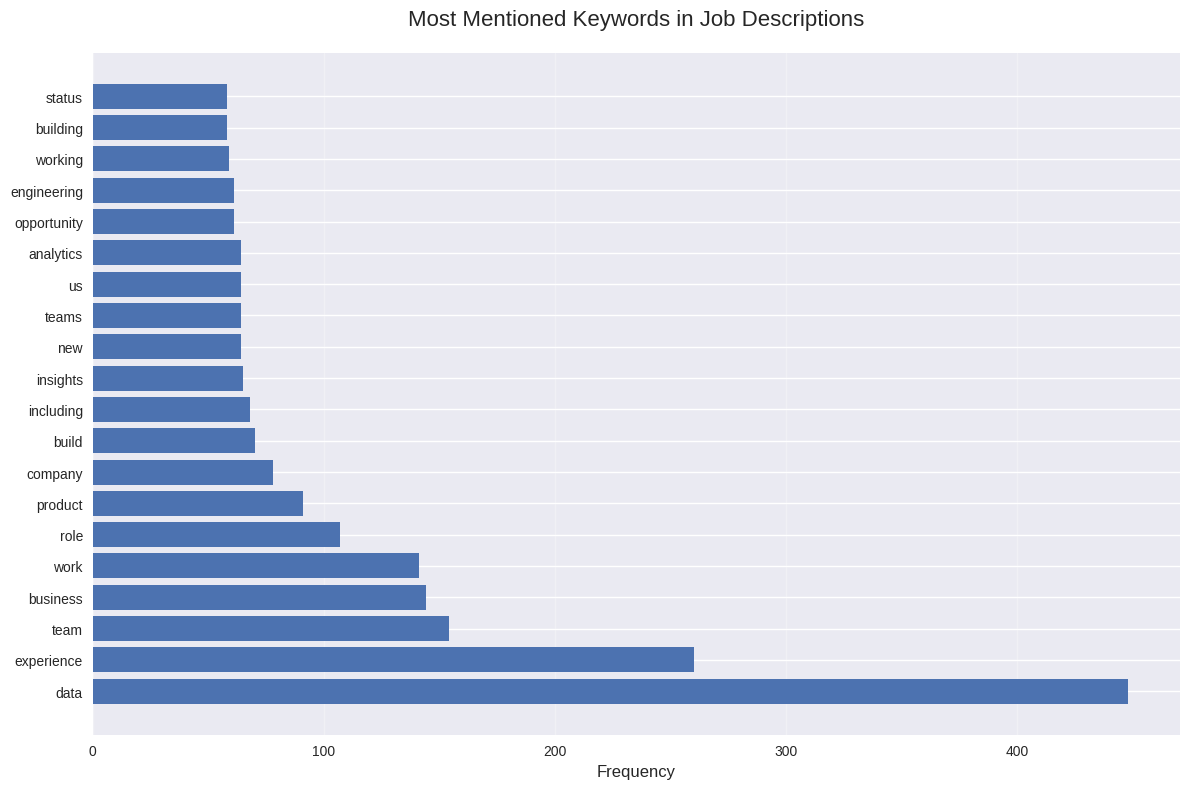

In [5]:
# Generate beautiful word cloud from job tags
if 'tags' in jobs_df.columns:
    print("🌟 Creating word cloud from job tags...")
    tags_text = ", ".join(jobs_df.tags.fillna("")).lower()
    
    if tags_text.strip():
        visualizer.plot_wordcloud(
            tags_text, 
            title="Hottest Skills & Technologies in Data Jobs",
            save_path="data/outputs/skills_wordcloud.png"
        )
    else:
        print("⚠️ No tags data available for word cloud")
else:
    print("⚠️ No tags column found in dataset")

# Create keywords bar chart
if analysis_results and 'keywords' in analysis_results:
    plot_keywords_bar_chart(
        analysis_results['keywords'],
        title="Most Mentioned Keywords in Job Descriptions",
        save_path="data/outputs/keywords_chart.png"
    )

## 💰 Salary Analysis

💸 Analyzing salary trends by location...

💼 Salary information available for 11 locations

🏆 Top 10 Highest Paying Locations:


,salaryMin,salaryMax
location,,
"Canada, USA",165700.0,214650.000000
"APAC, Australia",127000.0,203000.000000
Canada,140000.0,175833.333333
USA,122955.0,169483.571429
"Mexico, USA",70000.0,150000.000000
"Canada, Europe, USA",110000.0,147000.000000
US,75000.0,110000.000000
San Francisco,67500.0,97500.000000
United States,65000.0,90000.000000


<Figure size 1400x800 with 0 Axes>

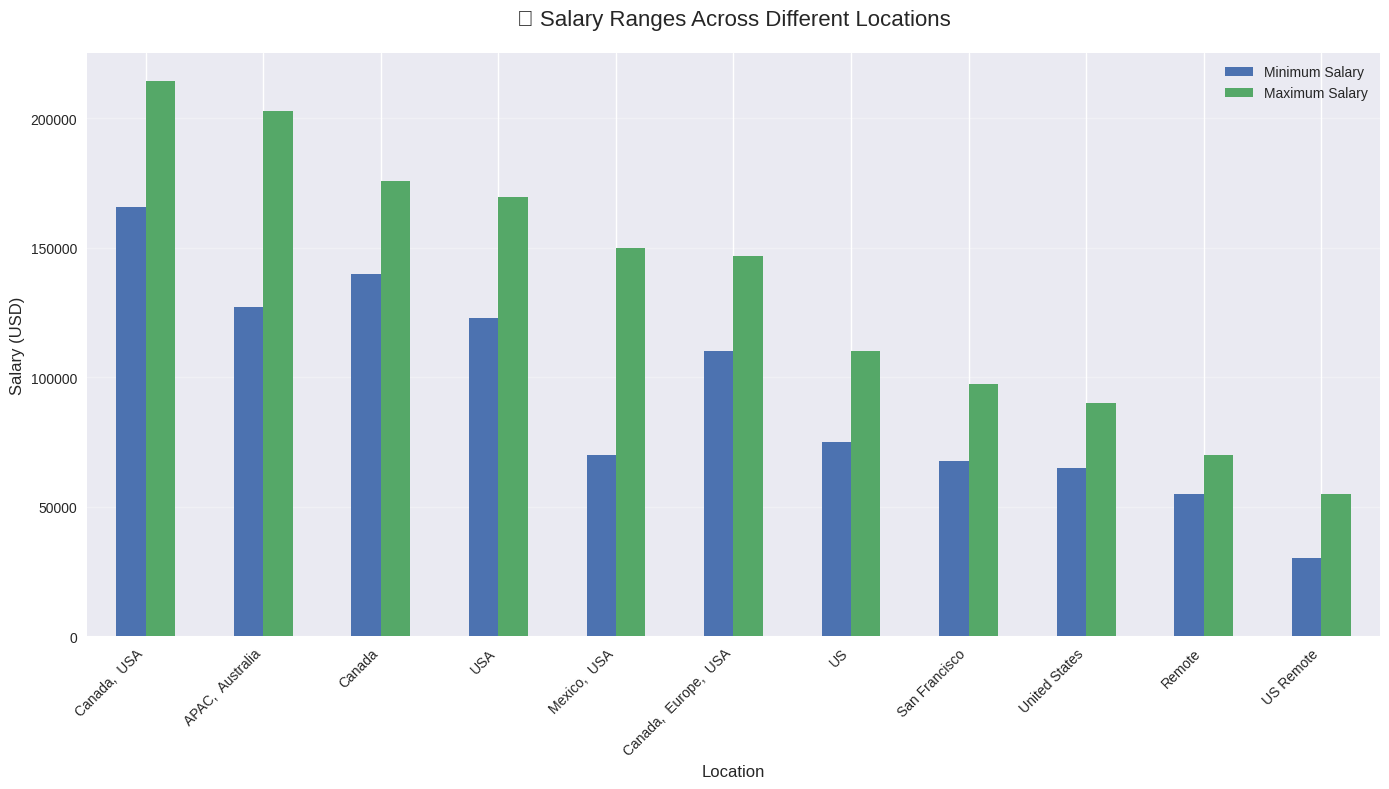

In [6]:
# Analyze and visualize salary trends
print("💸 Analyzing salary trends by location...")

salary_data = analyze_salary_trends_by_location(jobs_df)

if not salary_data.empty:
    print(f"\n💼 Salary information available for {len(salary_data)} locations")
    
    # Display top paying locations
    print("\n🏆 Top 10 Highest Paying Locations:")
    display(salary_data.head(10))
    
    # Create visualization
    plot_salary_trends_by_location(
        salary_data,
        title="💰 Salary Ranges Across Different Locations",
        save_path="data/outputs/salary_trends.png",
        top_n=12
    )
else:
    print("⚠️ No salary data available for analysis")

## 🏢 Job Types & Company Analysis

📊 Job Types Distribution:


jobType
full-time    34
              9
contract      1
Name: count, dtype: int64

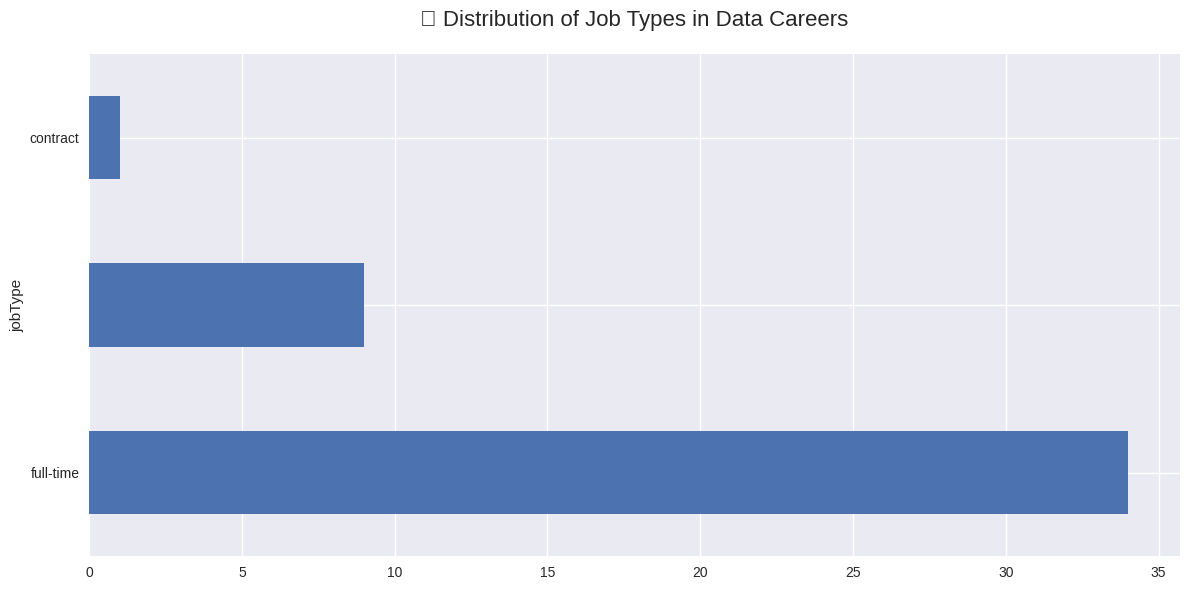

No company size data available for analysis.


In [7]:
# Analyze job types distribution
job_types = analyze_job_types(jobs_df)

if not job_types.empty:
    print("📊 Job Types Distribution:")
    display(job_types.head(10))
    
    visualizer.plot_job_distribution(
        job_types,
        title="🎯 Distribution of Job Types in Data Careers",
        plot_type='horizontal_bar',
        save_path="data/outputs/job_types_distribution.png"
    )
else:
    print("⚠️ No job type data available")

# Analyze company sizes if available
company_sizes = analyze_company_sizes(jobs_df)

if not company_sizes.empty:
    print("\n🏭 Company Sizes Distribution:")
    display(company_sizes)
    
    visualizer.plot_job_distribution(
        company_sizes,
        title="🏢 Job Distribution by Company Size",
        plot_type='pie',
        save_path="data/outputs/company_sizes.png"
    )

## 📊 Comprehensive Dashboard

🎨 Creating comprehensive analysis dashboard...


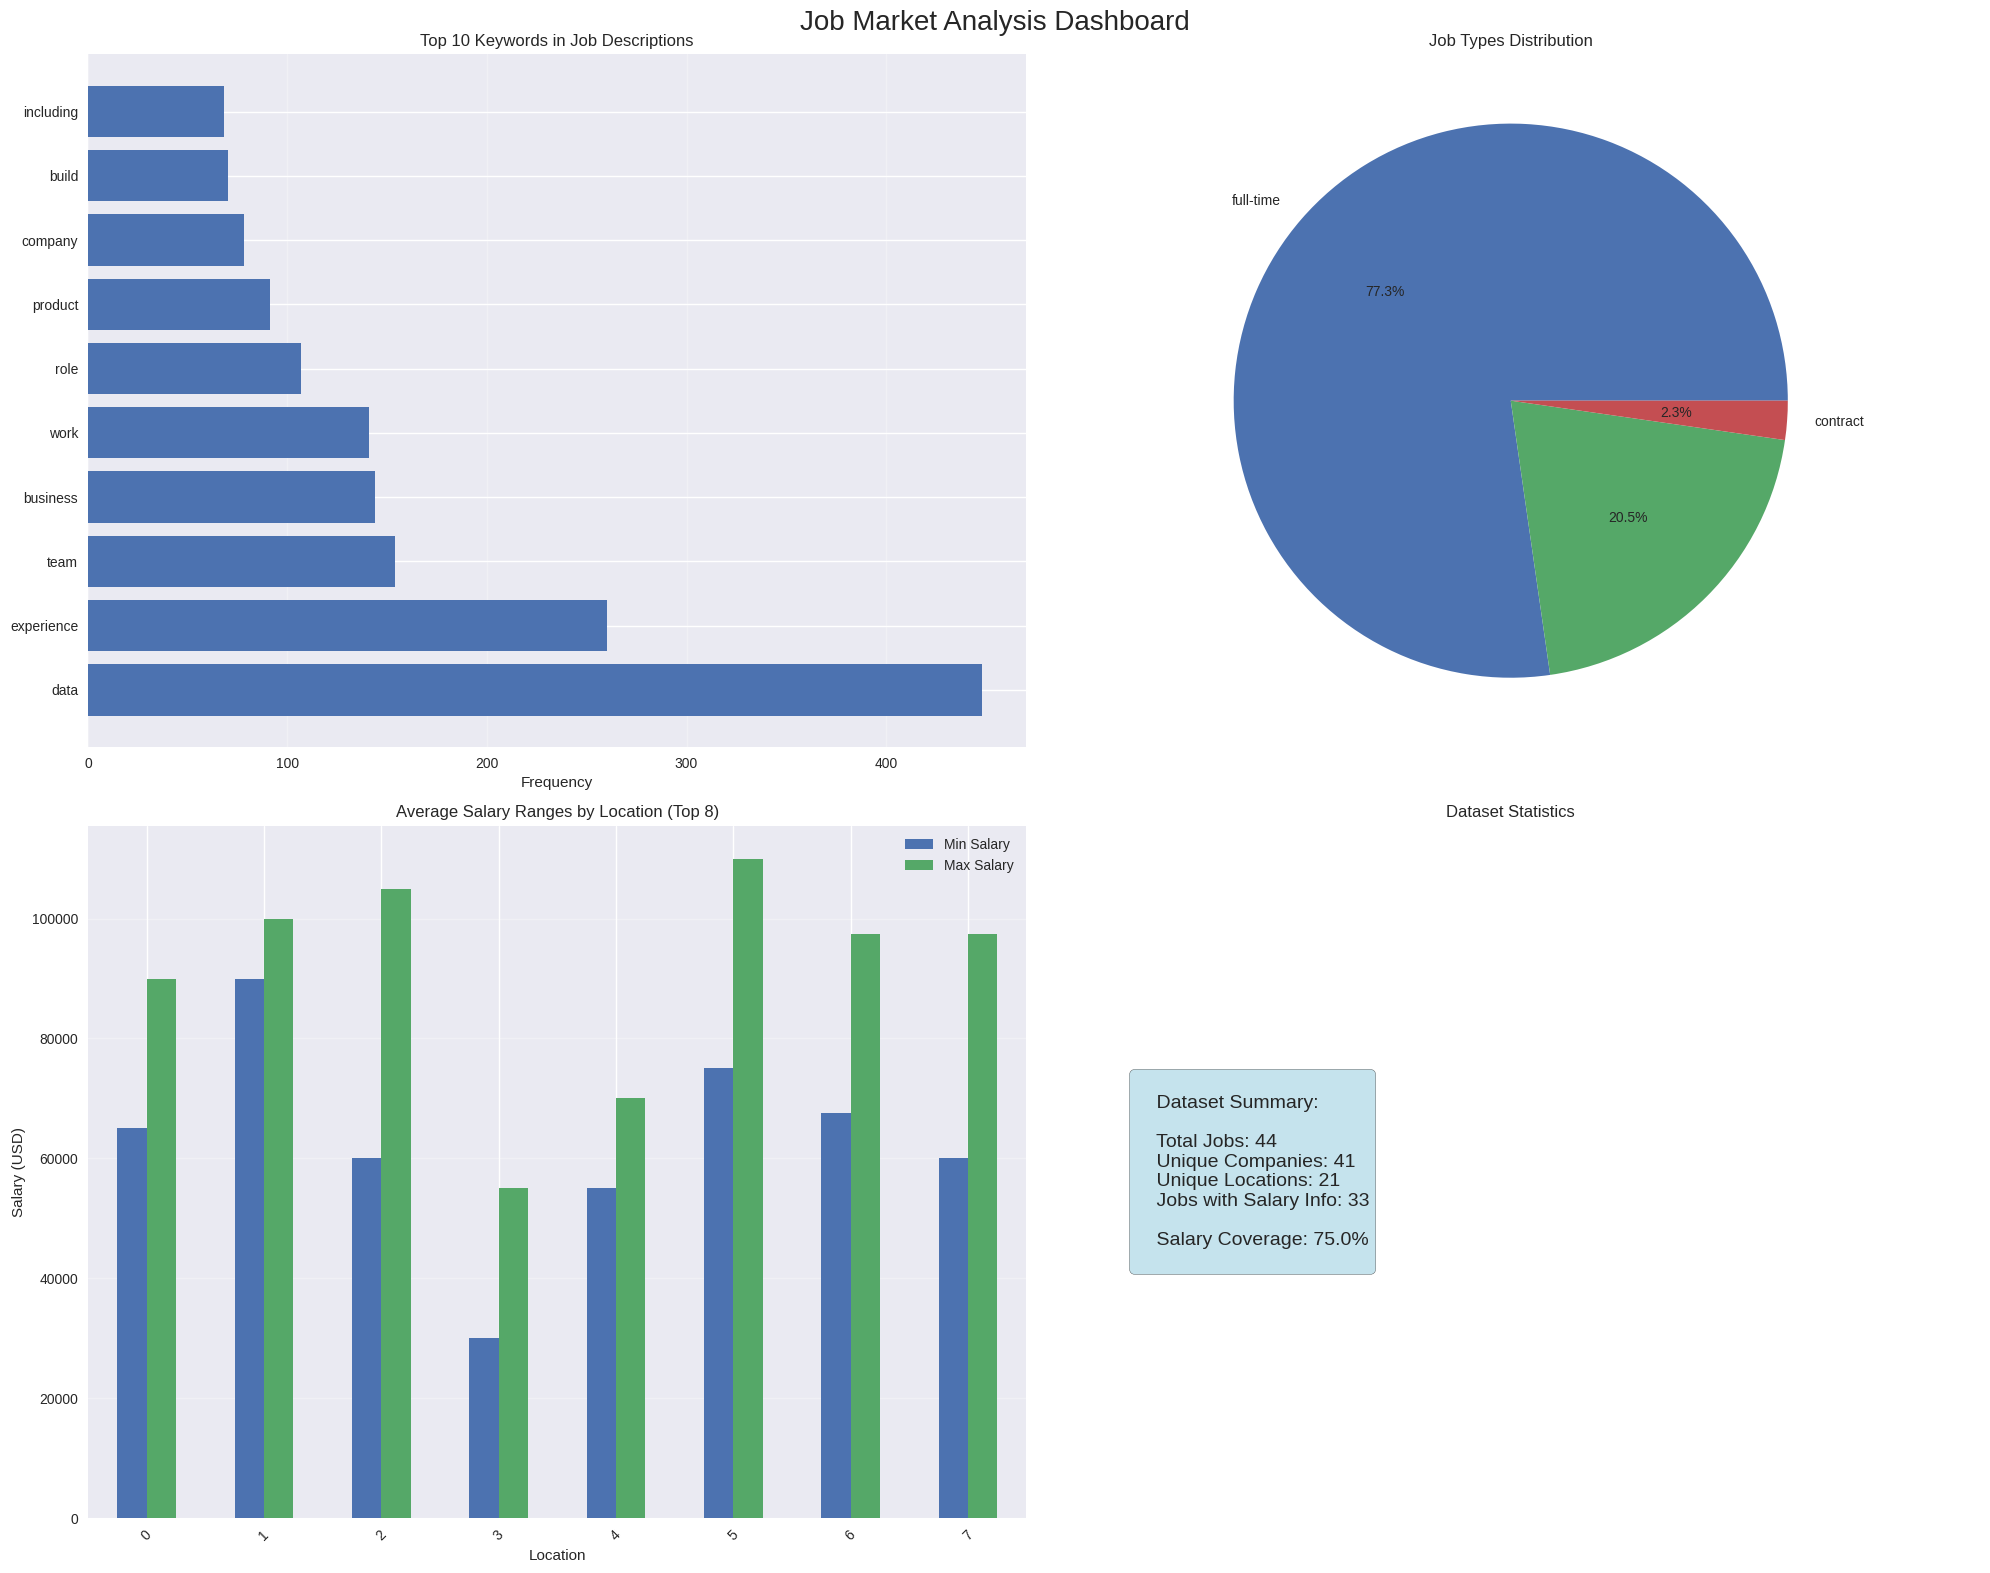

✅ Dashboard created successfully!


In [8]:
# Create a comprehensive dashboard
print("🎨 Creating comprehensive analysis dashboard...")

create_summary_dashboard(
    jobs_df,
    save_path="data/outputs/job_market_dashboard.png"
)

print("✅ Dashboard created successfully!")

## 📤 Export Results

In [9]:
# Export all analysis results in multiple formats
print("📦 Exporting analysis results...")

if analysis_results:
    exported_files = export_analysis_results(
        analysis_results,
        job_postings=jobs_df,
        output_format='all',
        filename='data_jobs_market_analysis'
    )
    
    print("\n📁 Files exported:")
    for file_type, file_path in exported_files.items():
        if file_path:
            print(f"  📄 {file_type}: {file_path}")
    
    print("\n🎉 All exports completed successfully!")
else:
    print("⚠️ No analysis results to export")

📦 Exporting analysis results...
Data exported to JSON: data/outputs/data_jobs_market_analysis_20250531_074909_summary.json
Data exported to CSV: data/outputs/data_jobs_market_analysis_20250531_074909_keywords.csv
Data exported to CSV: data/outputs/data_jobs_market_analysis_20250531_074909_salary_trends.csv
Error exporting to Excel: No module named 'xlsxwriter'
HTML report exported: data/outputs/data_jobs_market_analysis.html

📁 Files exported:
  📄 summary_json: data/outputs/data_jobs_market_analysis_20250531_074909_summary.json
  📄 keywords_csv: data/outputs/data_jobs_market_analysis_20250531_074909_keywords.csv
  📄 salary_csv: data/outputs/data_jobs_market_analysis_20250531_074909_salary_trends.csv
  📄 html_report: data/outputs/data_jobs_market_analysis.html

🎉 All exports completed successfully!


## 📋 Final Summary

In [10]:
# Display final summary
print("\n" + "="*60)
print("🎯 ANALYSIS SUMMARY")
print("="*60)

if analysis_results and 'stats' in analysis_results:
    stats = analysis_results['stats']
    
    print(f"📊 Total Jobs Analyzed: {stats.get('total_jobs', 0):,}")
    print(f"🏢 Unique Companies: {stats.get('unique_companies', 0):,}")
    print(f"🌍 Unique Locations: {stats.get('unique_locations', 0):,}")
    print(f"💰 Jobs with Salary Info: {stats.get('jobs_with_salary', 0):,}")
    
    if stats.get('total_jobs', 0) > 0:
        salary_coverage = (stats.get('jobs_with_salary', 0) / stats.get('total_jobs', 1)) * 100
        print(f"📈 Salary Data Coverage: {salary_coverage:.1f}%")
    
    if analysis_results.get('keywords'):
        top_skill = analysis_results['keywords'][0][0]
        print(f"🔥 Most In-Demand Skill: {top_skill}")
    
    print(f"\n📅 Analysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print("\n🚀 Ready to make data-driven career decisions!")
else:
    print("⚠️ Analysis results not available")

print("="*60)


🎯 ANALYSIS SUMMARY
📊 Total Jobs Analyzed: 44
🏢 Unique Companies: 41
🌍 Unique Locations: 21
💰 Jobs with Salary Info: 33
📈 Salary Data Coverage: 75.0%
🔥 Most In-Demand Skill: data

📅 Analysis completed: 2025-05-31 07:49:19

🚀 Ready to make data-driven career decisions!


## 🛠️ Custom Analysis Playground

Use the cells below for your own custom analysis and exploration!

In [ ]:
# Your custom analysis here!
# Example: Analyze specific technologies or job titles

# Search for specific technologies
tech_keywords = ['python', 'sql', 'tableau', 'power bi', 'machine learning', 'aws']

if 'description' in jobs_df.columns:
    print("🔍 Technology mention analysis:")
    for tech in tech_keywords:
        count = jobs_df['description'].str.contains(tech, case=False, na=False).sum()
        percentage = (count / len(jobs_df)) * 100
        print(f"  {tech.title()}: {count} jobs ({percentage:.1f}%)")
else:
    print("⚠️ No description column available for technology analysis")

In [ ]:
# Add your own analysis cells here!
# Ideas:
# - Remote vs on-site job analysis
# - Experience level requirements
# - Job posting trends over time
# - Company-specific analysis
# - Geographic clustering of opportunities